### Table of Contents
- [skip to training the small purchase model](#Small-Train)
- [skip to training the large purchase model](#Large-Train)

In [2]:
import pandas as pd
import numpy as np


#visualizations libraries
import matplotlib.pyplot as plt
import seaborn as sns
color_pal = sns.color_palette()

plt.style.use('bmh')
plt.rc(
    "figure",
    autolayout=True,
    figsize=(11, 4),
    titlesize=18,
    titleweight='bold',
)
plt.rc(
    "axes",
    labelweight="bold",
    labelsize="large",
    titleweight="bold",
    titlesize=16,
    titlepad=10,
)

#machine learning libraries
import xgboost as xgb
import catboost as cb 
from sklearn.metrics import mean_squared_error

from matplotlib import patheffects


import os


#project modules
import src.wrangle as wr
import src.summaries as su
import src.explore as ex

%config InlineBackend.figure_format = 'retina'
pd.set_option('display.float_format', lambda x: '%.5f' % x)
from importlib import reload



In [49]:
df = wr.get_clean_data(start2018=True)
train, test = wr.split_data(df, explore=True)
validate = test.loc[:'2022-06'].copy() 
test = test.loc['2022-07':]

/Users/CryanRedrose/codeup-data-science/CodeUp/cisco-time-series-analysis/rosenberger/src/wrangle.py:128: FutureWarning: weekofyear and week have been deprecated, please use DatetimeIndex.isocalendar().week instead, which returns a Series. To exactly reproduce the behavior of week and weekofyear and return an Index, you may call pd.Int64Index(idx.isocalendar().week)
  df['week'] = df.index.week
/Users/CryanRedrose/codeup-data-science/CodeUp/cisco-time-series-analysis/rosenberger/src/wrangle.py:145: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.customer_type.replace({'Assistance Org':'Other'},inplace=True)


## time series at a glance

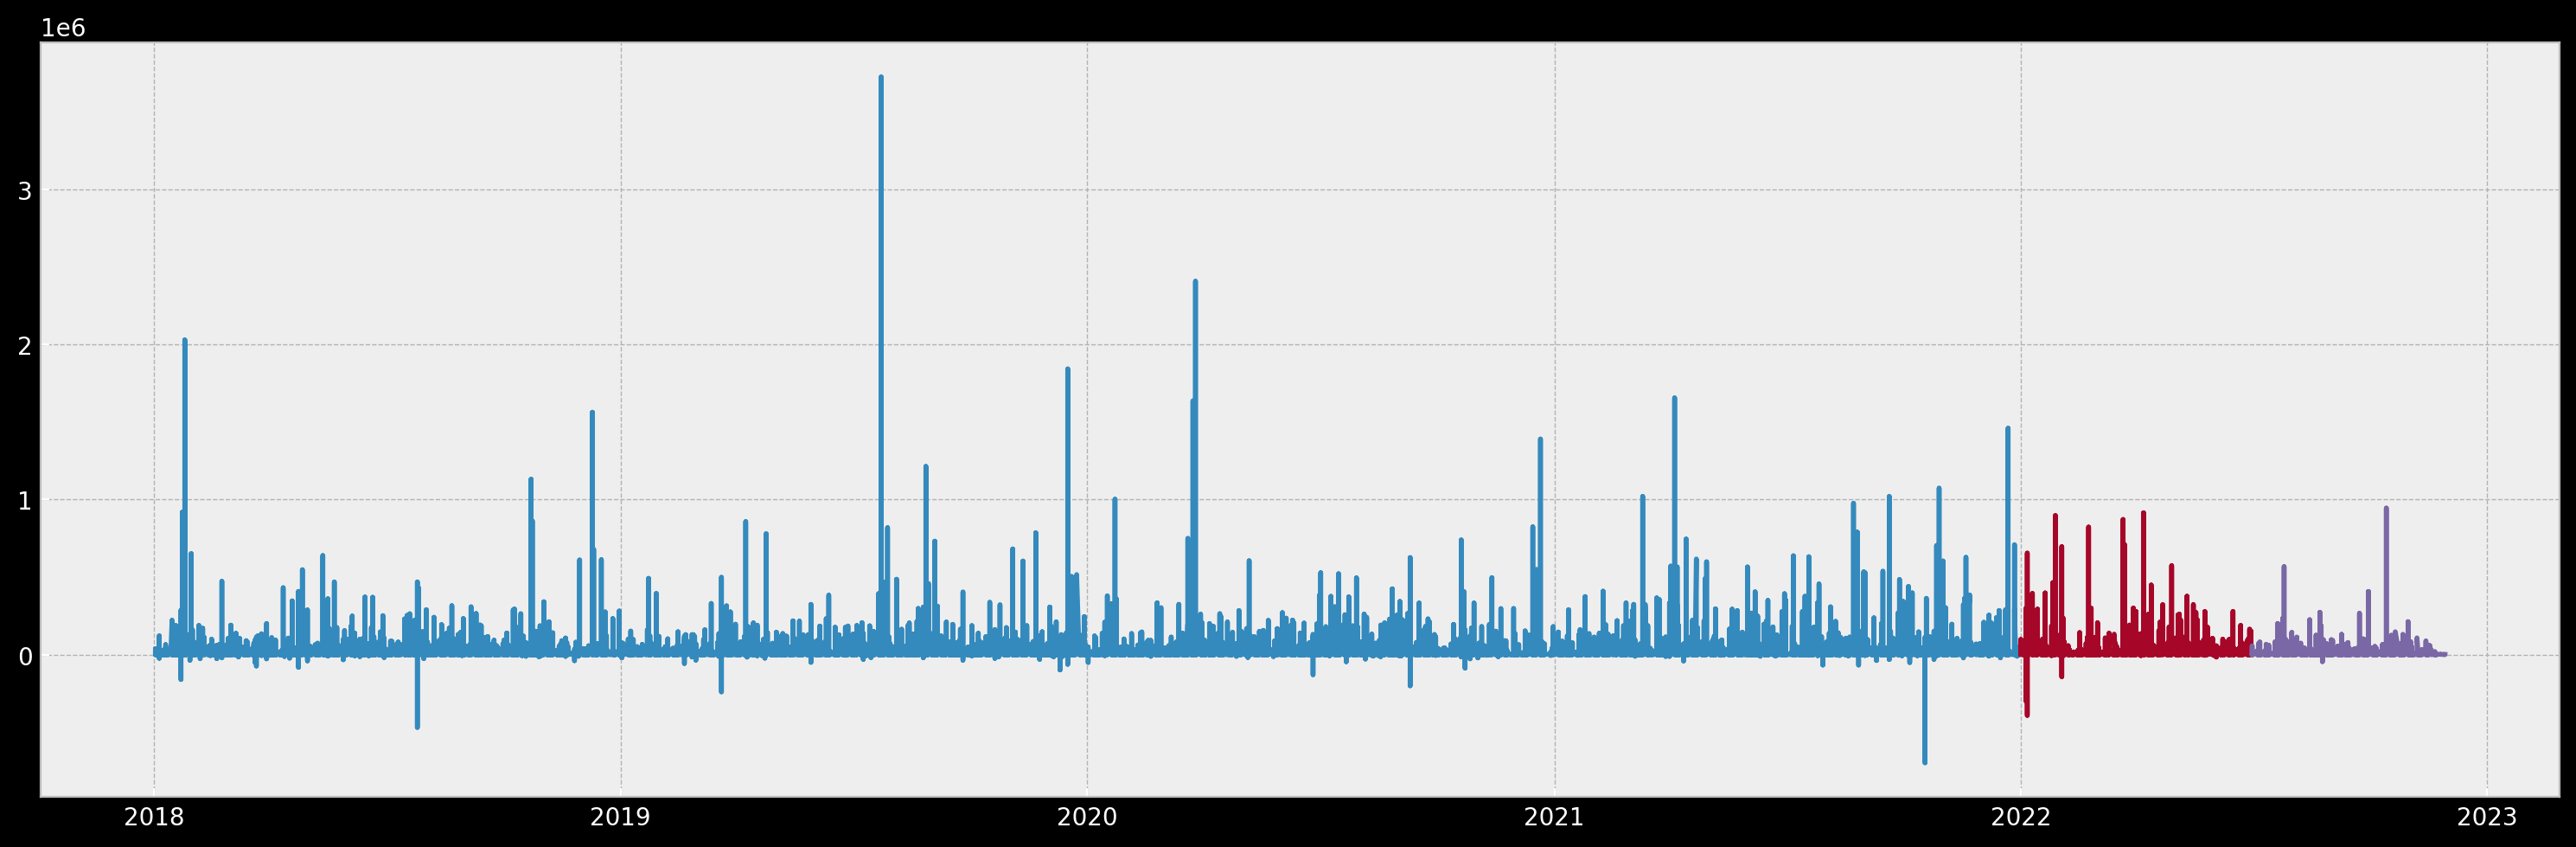

In [50]:
fix, ax = plt.subplots(figsize = (15,5))
plt.plot(train.index, train['purchase_amount'])
plt.plot(validate.index, validate['purchase_amount'])
plt.plot(test.index, test['purchase_amount'])

### alternative plots

In [19]:
def clean_df(df):
    df = df.drop(columns = ['shipped_date', 'order_date_copy'])
    df['purchase_amount'] = df['purchase_amount'].astype('int64')
    df['customer_zip'] = df['customer_zip'].astype('int16')
    df['order_quantity'] = df['order_quantity'].astype('int16')
    df['unit_price'] = df['unit_price'].astype('float64')
    
    return df

In [20]:
df = clean_df(df)

In [ ]:
df_large_price = df[df['unit_price'] > 5]
df_small_price = df[df['unit_price'] <= 5]

In [ ]:
df_large_price.shape[0], df_small_price.shape[0], df_large_price.shape[0] + df_small_price.shape[0], df.shape[0]

(232629, 29257, 261886, 261886)

In [43]:
df = wr.get_clean_data(start2018=True)
df = clean_df(df)
n = 5
df_large_price = df[df['unit_price'] > n]
df_small_price = df[df['unit_price'] <= n]

lp_train, lp_test = wr.split_data(df_large_price, explore=True)
lp_validate = lp_test.loc[:'2022-06'].copy() 
lp_test = lp_test.loc['2022-07':]

sp_train, sp_test = wr.split_data(df_small_price, explore=True)
sp_validate = sp_test.loc[:'2022-06'].copy() 
sp_test = sp_test.loc['2022-07':]

/Users/CryanRedrose/codeup-data-science/CodeUp/cisco-time-series-analysis/rosenberger/src/wrangle.py:128: FutureWarning: weekofyear and week have been deprecated, please use DatetimeIndex.isocalendar().week instead, which returns a Series. To exactly reproduce the behavior of week and weekofyear and return an Index, you may call pd.Int64Index(idx.isocalendar().week)
  df['week'] = df.index.week
/Users/CryanRedrose/codeup-data-science/CodeUp/cisco-time-series-analysis/rosenberger/src/wrangle.py:145: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.customer_type.replace({'Assistance Org':'Other'},inplace=True)


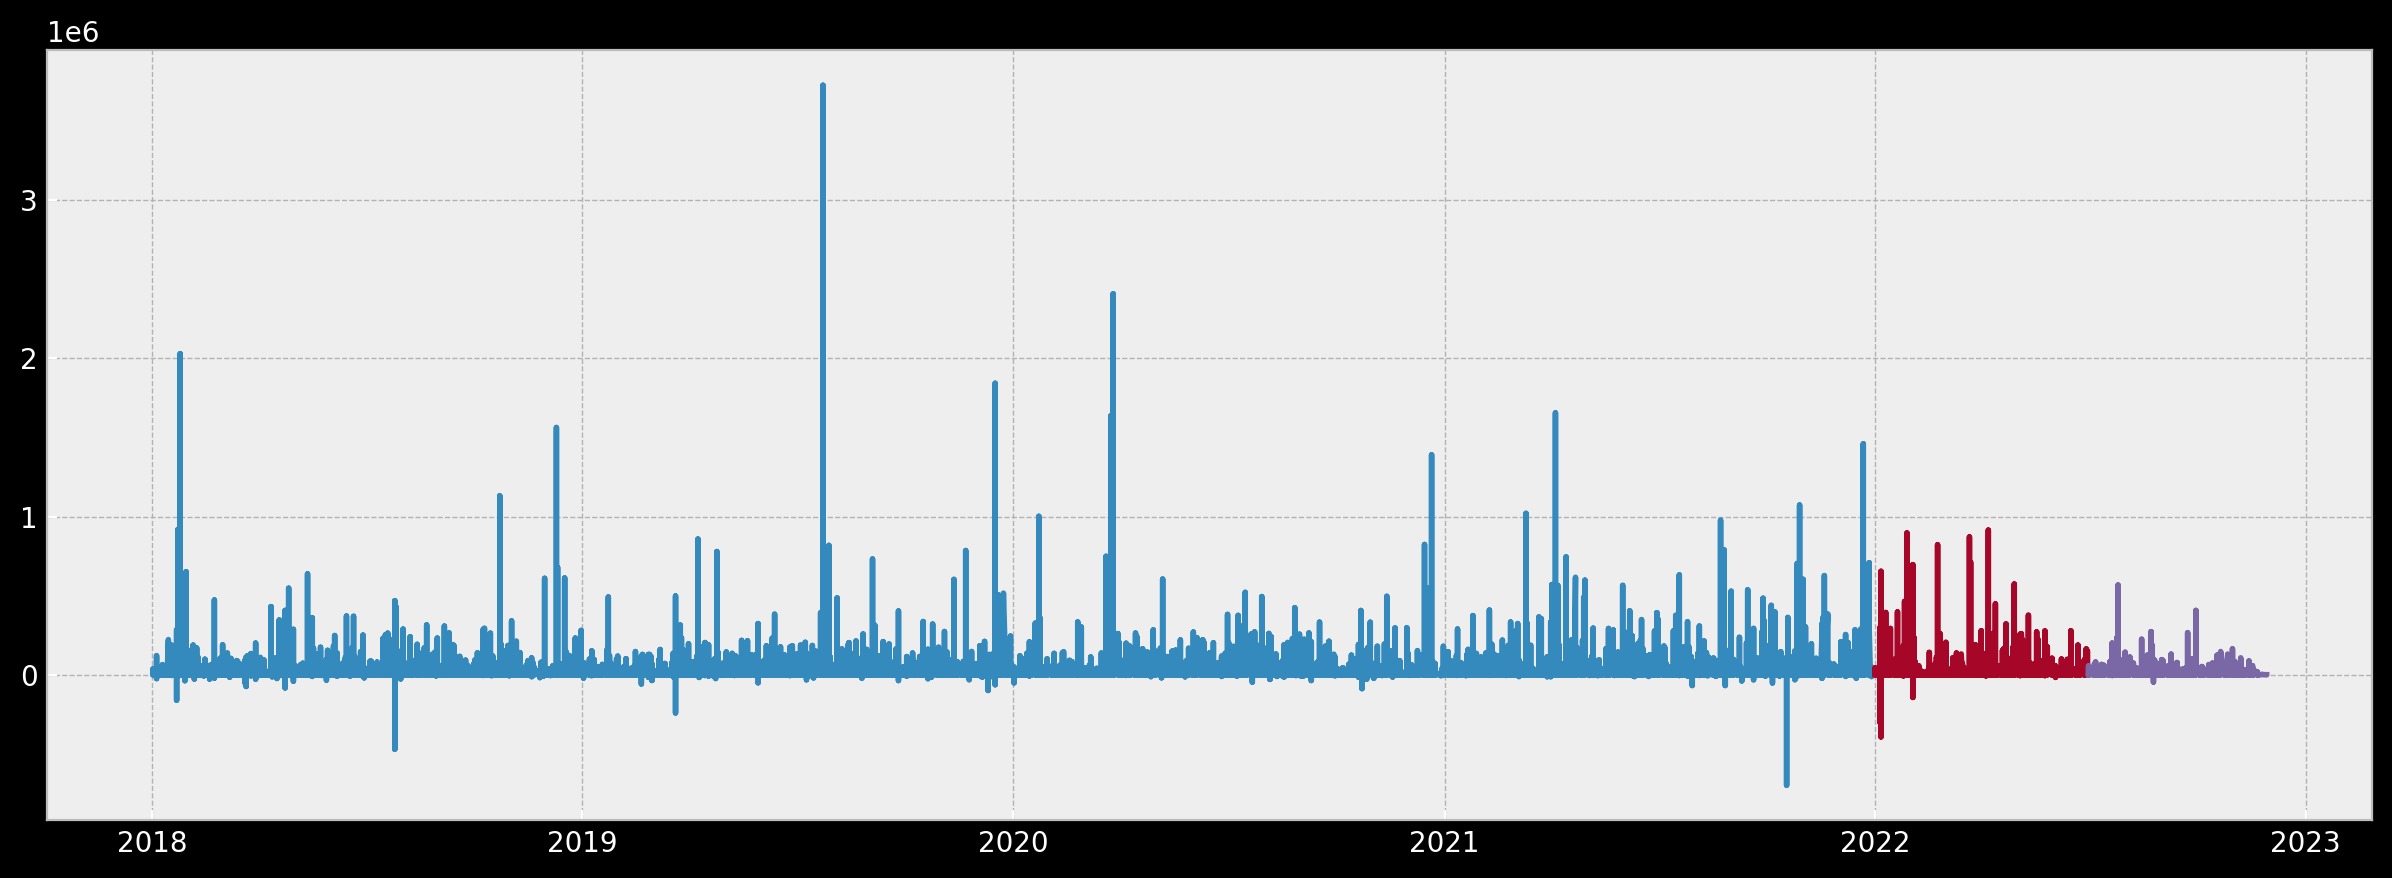

In [44]:
fix, ax = plt.subplots(figsize = (15,5))
plt.plot(lp_train.index, lp_train['purchase_amount'])
plt.plot(lp_validate.index, lp_validate['purchase_amount'])
plt.plot(lp_test.index, lp_test['purchase_amount'])

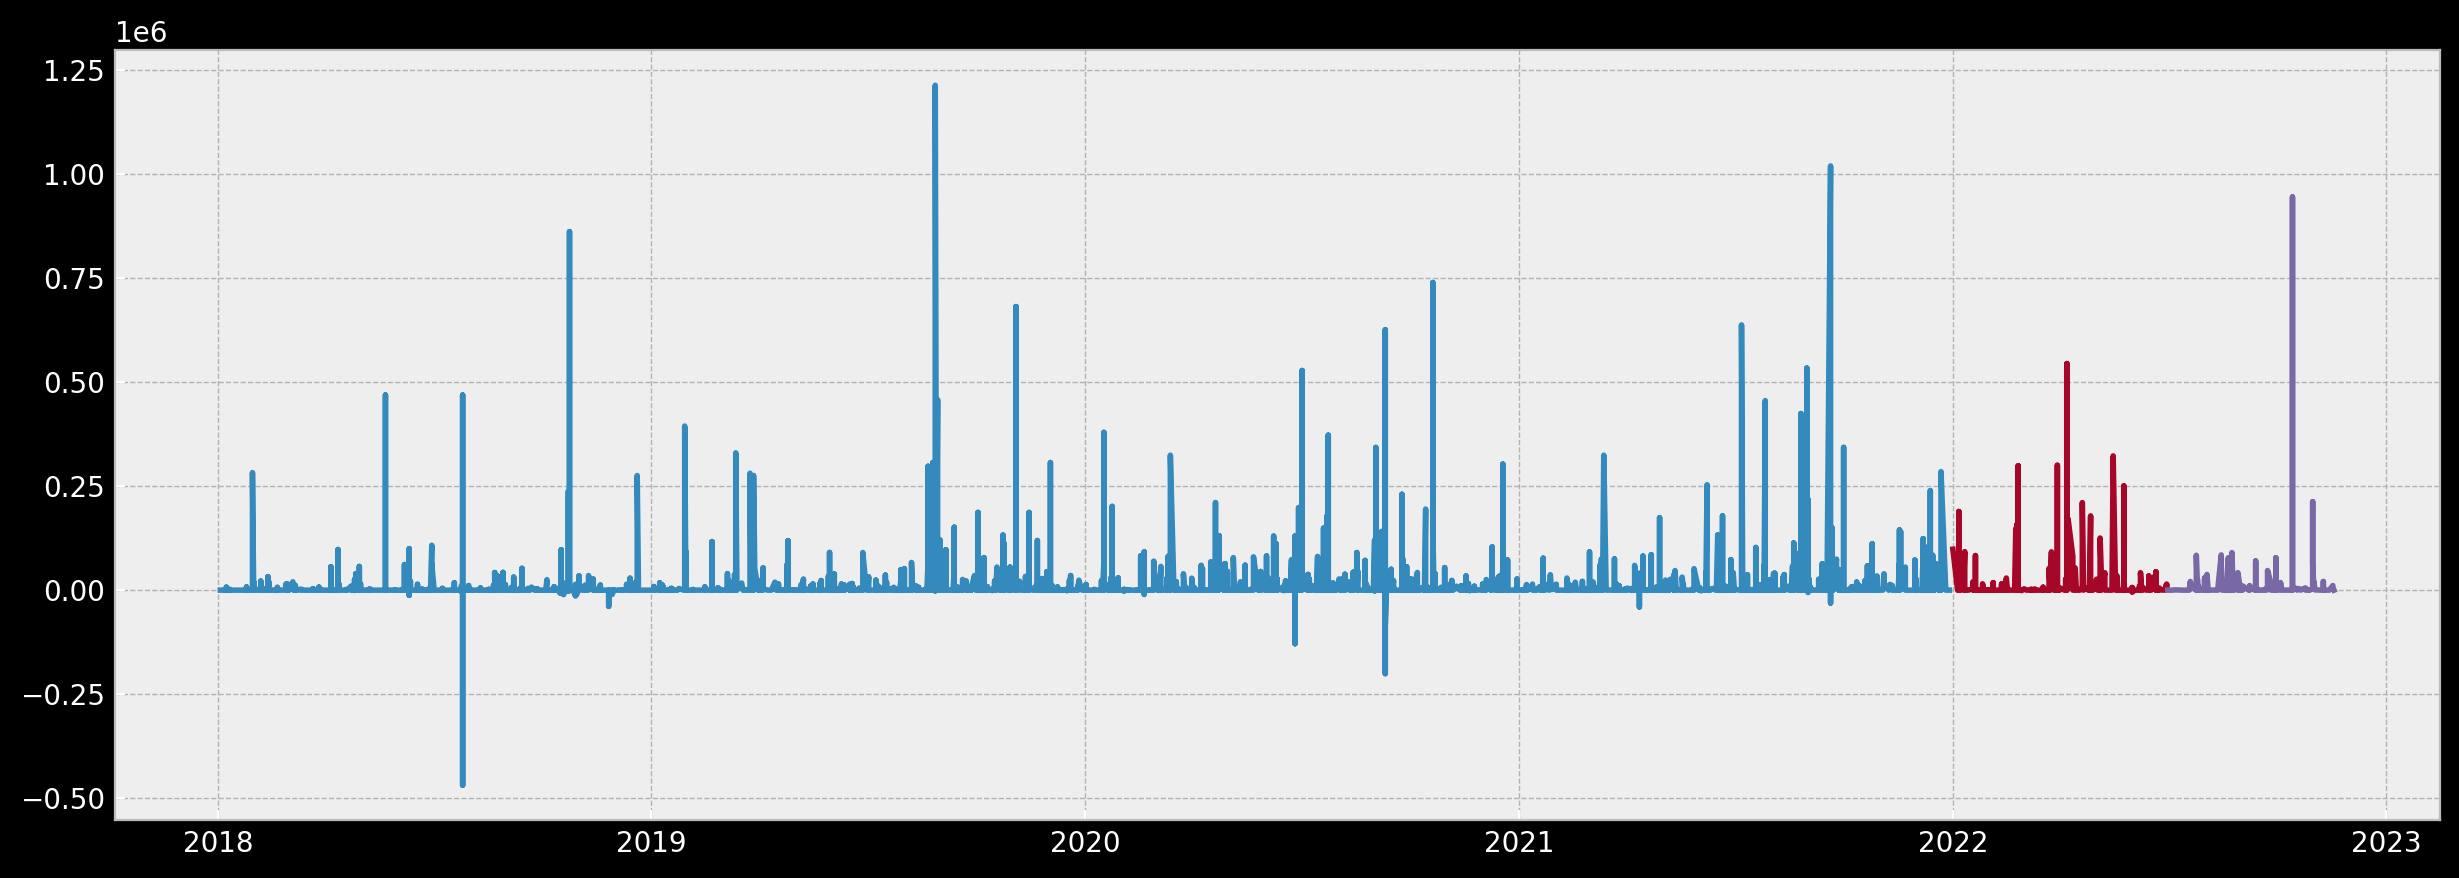

In [45]:
fix, ax = plt.subplots(figsize = (15,5))
plt.plot(sp_train.index, sp_train['purchase_amount'])
plt.plot(sp_validate.index, sp_validate['purchase_amount'])
plt.plot(sp_test.index, sp_test['purchase_amount'])

## Small Train

-[return to TOC](#Table-of-Contents)

<AxesSubplot:xlabel='order_date'>

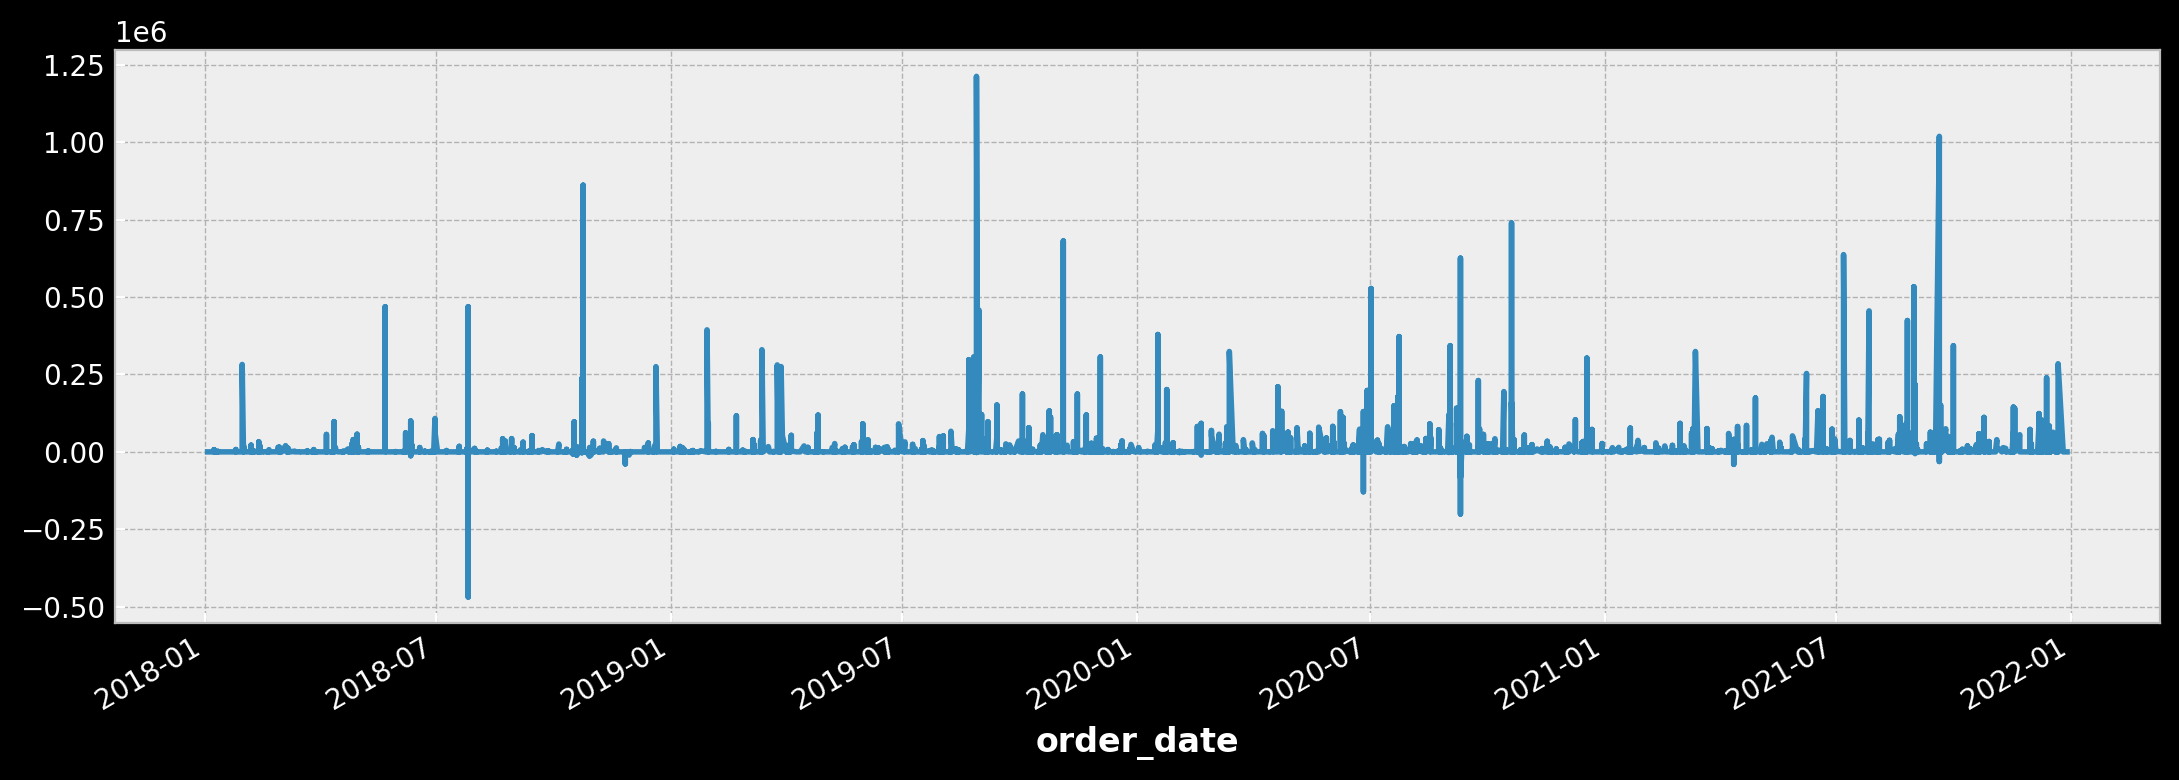

In [53]:
small_train = sp_train['purchase_amount'].copy()
small_train.plot()

In [54]:
small_baseline = small_train.mean()
small_baseline

1797.7566462920686

### Variables
- sp_train
- sp_validate
- sp_test

In [ ]:
pred=model.predict(sp_train['purchase_amount'])
plt.plot(pred, label = 'XGBoost Predictions')
plt.plot(y_val, label='Actual sales')
plt.legend(loc = 'upper left')
plt.show()

## Large Train

-[return to TOC](#Table-of-Contents)

<AxesSubplot:xlabel='order_date'>

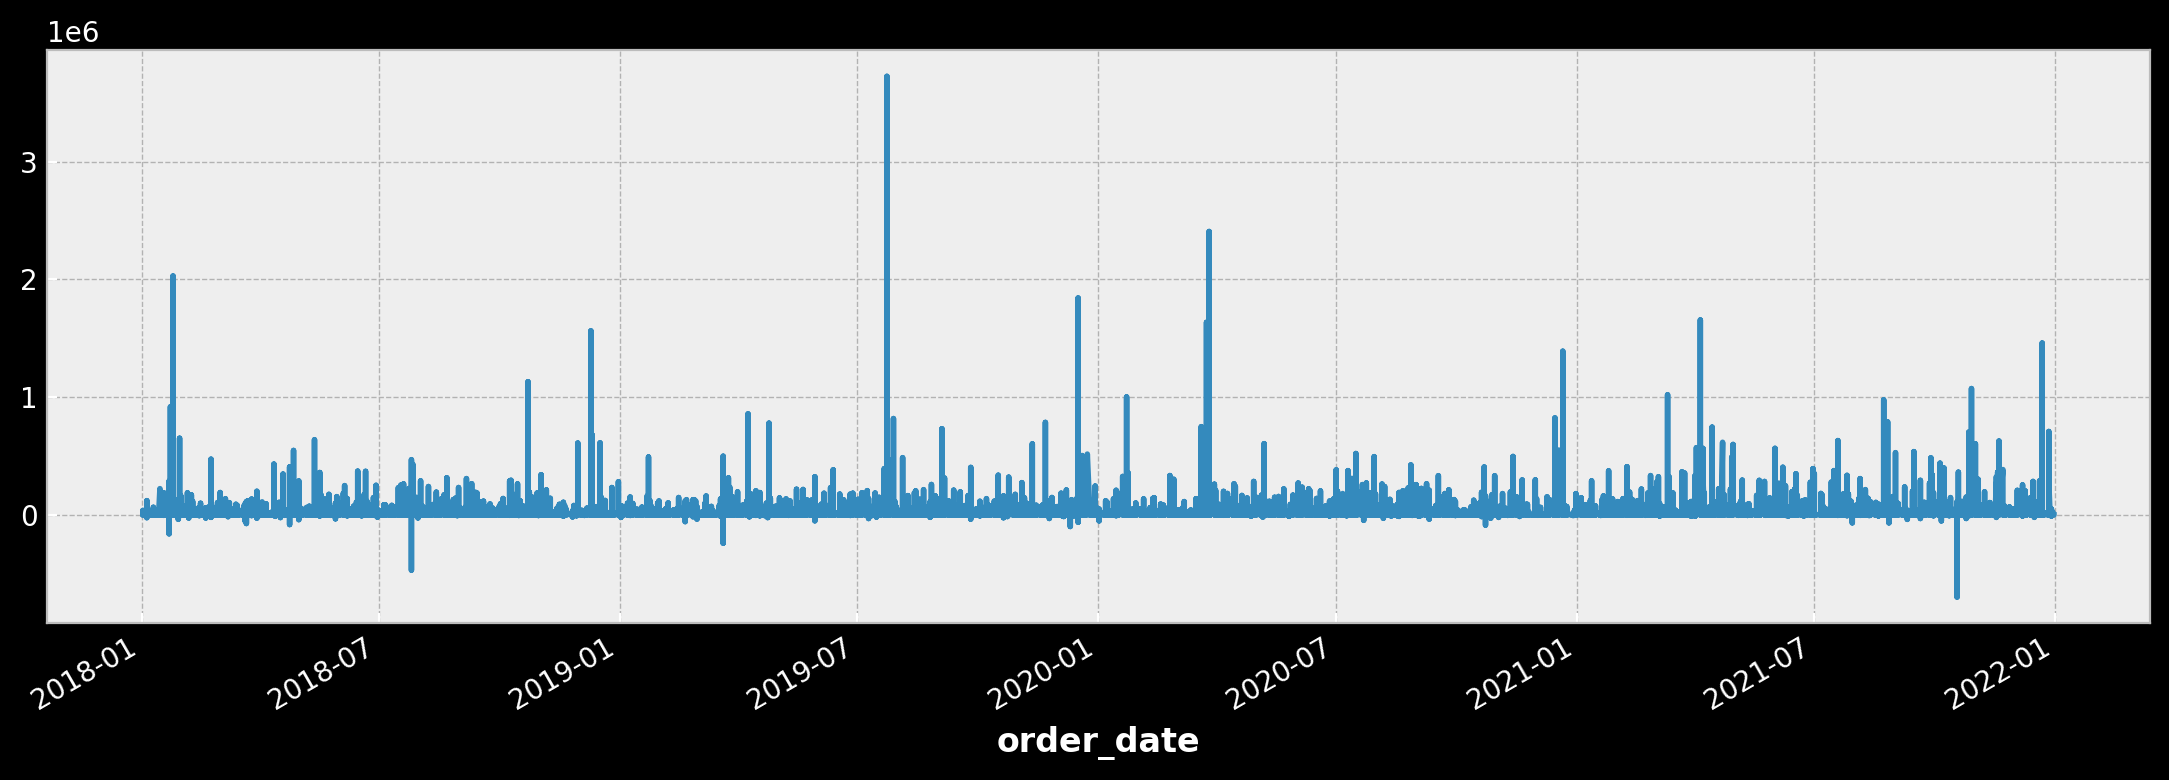

In [55]:
large_train = lp_train['purchase_amount'].copy()
large_train.plot()

In [56]:
large_baseline = large_train.mean()
large_baseline

4353.641042007612